In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

A reasonably Pythonic way of plotting the $\sin$ function without using NumPy explicity...

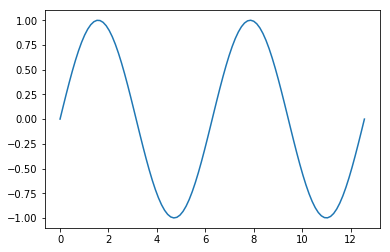

In [3]:
n_points = 100

delta = 4*math.pi/(n_points-1)
x = [delta*i for i in range(n_points)]
y = [math.sin(x_i) for x_i in x]
plt.plot(x, y)

Generating the x-points using NumPy...

In [4]:
x = np.linspace(0, 4*np.pi, n_points)

Totally missing the point of NumPy arrays:

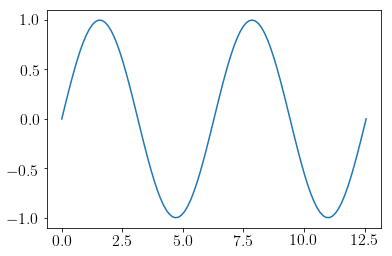

In [9]:
y = np.zeros(len(x))
for i, x_i in enumerate(x):
    y[i] = np.sin(x_i)
plt.plot(x,y)

The correct approach:

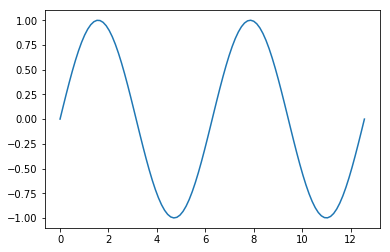

In [6]:
y = np.sin(x)
plt.plot(x, y)

I cannot think of a situation for which iterating over a NumPy array is the right thing to do. If you ever think you need to do this, think again. 

Get comfortable _vectorizing_ your scientific computing code: perform operations on entire arrays compactly using NumPy.

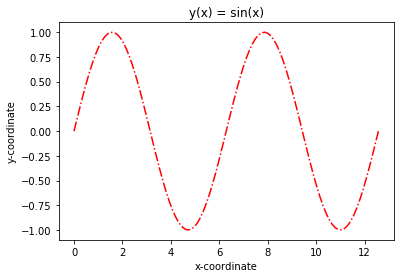

In [7]:
plt.plot(x, y, 'r-.')
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("y(x) = sin(x)")

Fancy use of `matplotlib` is not important for the class; I just wanted to show you what you _can_ do. I don't memorize this stuff; I look up what I want to do when I need it.

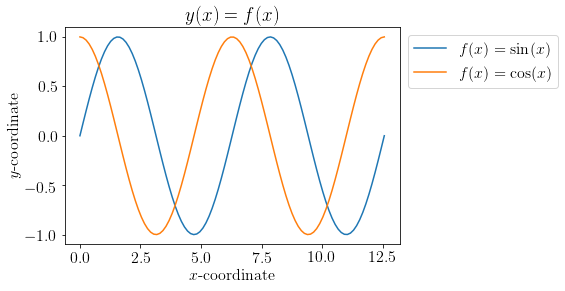

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 16)
plt.plot(x, y, x, np.cos(x))
plt.xlabel("$x$-coordinate") # supports LaTeX, if you know it
plt.ylabel("$y$-coordinate")
plt.title("$y(x) = f(x)$")
plt.legend(("$f(x) = \sin(x)$", "$f(x) = \cos(x)$"), bbox_to_anchor = (1,1))

In [15]:
x = np.arange(24)
print x

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [16]:
y = x.reshape((4,6)) # 4 rows, 6 columns
print y

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [22]:
z = x.reshape((2,3,-1)) # 2 pages, 3 rows, as many columns as needed to preserve the number of elements
print z

[[[  0   1   2   3]
  [  4   5   6   7]
  [  8   9  10 999]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


General rule: when specifying the shape of an array, columns is always last. Rows is second to last. "Pages" is third to last. And so on.

Caution: for efficiency, many NumPy operations avoid copying data. They just give you different _views_ of the underlying data.

In [19]:
x[11] = 999
print x
print y
print z

[  0   1   2   3   4   5   6   7   8   9  10 999  12  13  14  15  16  17
  18  19  20  21  22  23]
[[  0   1   2   3   4   5]
 [  6   7   8   9  10 999]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]
[[[  0   1   2   3]
  [  4   5   6   7]
  [  8   9  10 999]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


<h3>Multidimensional Indexing:</h3> <br>
As with shapes, the column index goes last, the row index goes second to last, the "page" goes third to last, etc...

In [21]:
z[1,2,0]

20

<h3>Slicing:</h3> <br>
Slicing works the same way as it did with lists.

In [25]:
y = x[1:8:2] # slicing
print y

[1 3 5 7]


Except that it creates a _view_. It does not copy the data.

In [26]:
y[:] = 0
print x

[  0   0   2   0   4   0   6   0   8   9  10 999  12  13  14  15  16  17
  18  19  20  21  22  23]


You need to be explicit if you really need to copy data; you use the `copy` method. But try to avoid it.

<h3>Fancy Indexing:</h3> <br>
Boolean masks are a really powerful tool for manipulating arrays.

In [35]:
x = np.arange(10)
mask = x <= 6
print mask
print x[mask]

[ True  True  True  True  True  True  True False False False]
[0 1 2 3 4 5 6]


Unfortunately, we can't chain logical operators as we can with built-in data types. You have to explicitly use NumPy's versions of the boolean operators.

In [44]:
mask1 = x <= 6
mask2 = x >= 3
mask3 = np.logical_and(mask1, mask2)
print mask1
print mask2
print mask3

[ True  True  True  True  True  True  True False False False]
[False False False  True  True  True  True  True  True  True]
[False False False  True  True  True  True False False False]


In [45]:
mask4 = np.logical_xor(mask1, mask2) # we learned xor the other day
print mask4

[ True  True  True False False False False  True  True  True]


Boolean masks create a _copy_ of the data.

In [47]:
y = x[mask]
print x
print y
y[:] = 0
print x
print y

[0 1 2 3 4 5 6 7 8 9]
[3 4 5 6]
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0]


Another form of fancy indexing is using index arrays. I don't use this quite as often, but it can come in handy.

In [56]:
x = np.arange(24).reshape((4,-1))
print x
y = np.arange(x.shape[1])
print y

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[0 1 2 3 4 5]


In [55]:
i = np.random.permutation(y)
print i
print x[:,i]

[1 4 3 2 0 5]
[[ 1  4  3  2  0  5]
 [ 7 10  9  8  6 11]
 [13 16 15 14 12 17]
 [19 22 21 20 18 23]]


<h3>Broadcasting:</h3> <br>
A fancy name for the rules when applying operations to shapes of different shapes.

Typically, operations are performed element by element.

In [65]:
x = np.arange(10)
print x * x

[ 0  1  4  9 16 25 36 49 64 81]


But when we have arrays of different sizes...

In [61]:
y = x.reshape((1,-1))
print y

[[0 1 2 3 4 5 6 7 8 9]]


In [60]:
z = x.reshape((-1,1))
print z

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [63]:
print y+z

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]


The operation can be performed on every combination of elements from the two arrays.
Not essential for this class, but can be really handy in writing compact code for scientific computing.